In [132]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [133]:
ds = ".\\DS\\df_575000.csv" 
df = pd.read_csv(ds)

In [134]:
df.head(3)

,Unnamed: 0,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,340035,52916,3,2,0,12,0,6,6,6.00,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,254724,80,86051432,7,7,413,11595,407,0,59.00,...,20,2020.0,0.0,2020,2020,85900000.0,0.0,85900000,85900000,DoS Hulk
2,90206,443,80742,8,4,546,3495,193,0,68.25,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [135]:
df.shape

(575000, 80)

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 575000 entries, 0 to 574999
Data columns (total 80 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   575000 non-null  int64  
 1   Destination Port             575000 non-null  int64  
 2   Flow Duration                575000 non-null  int64  
 3   Total Fwd Packets            575000 non-null  int64  
 4   Total Backward Packets       575000 non-null  int64  
 5   Total Length of Fwd Packets  575000 non-null  int64  
 6   Total Length of Bwd Packets  575000 non-null  int64  
 7   Fwd Packet Length Max        575000 non-null  int64  
 8   Fwd Packet Length Min        575000 non-null  int64  
 9   Fwd Packet Length Mean       575000 non-null  float64
 10  Fwd Packet Length Std        575000 non-null  float64
 11  Bwd Packet Length Max        575000 non-null  int64  
 12  Bwd Packet Length Min        575000 non-null  int64  
 13 

In [137]:
df.describe().T

c:\Files\Code\repo\benchmark_ml_dl_tr\env\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Files\Code\repo\benchmark_ml_dl_tr\env\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,575000.0,2.193543e+05,1.655723e+05,0.0,88421.0,177858.0,320509.5,692692.0
Destination Port,575000.0,8.047551e+03,1.825988e+04,0.0,53.0,80.0,443.0,65535.0
Flow Duration,575000.0,1.478292e+07,3.363565e+07,-13.0,155.0,31336.0,3252934.0,119999992.0
Total Fwd Packets,575000.0,8.336753e+00,5.927451e+02,1.0,2.0,2.0,5.0,202456.0
Total Backward Packets,575000.0,9.049572e+00,7.943878e+02,0.0,1.0,2.0,4.0,272353.0
...,...,...,...,...,...,...,...,...
Active Min,575000.0,5.749389e+04,5.199032e+05,0.0,0.0,0.0,0.0,72400000.0
Idle Mean,575000.0,8.304506e+06,2.360630e+07,0.0,0.0,0.0,0.0,120000000.0
Idle Std,575000.0,5.029885e+05,4.601737e+06,0.0,0.0,0.0,0.0,76600000.0
Idle Max,575000.0,8.682639e+06,2.434272e+07,0.0,0.0,0.0,0.0,120000000.0


In [138]:
# Discarding NA values.
df= df.dropna()
df.shape

(574743, 80)

In [139]:
## feature selection phase - find cols w/ all zero values 

#all_datav2.describe().iloc[1:].apply(np.sum, index=[])
describe_info = df.describe()
all_zeroes_cols = describe_info.loc[:,(describe_info.iloc[1:] == 0).all()]
all_zeroes_cols

c:\Files\Code\repo\benchmark_ml_dl_tr\env\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Files\Code\repo\benchmark_ml_dl_tr\env\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Bwd PSH Flags,Bwd URG Flags,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate
count,574743.0,574743.0,574743.0,574743.0,574743.0,574743.0,574743.0,574743.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [140]:
df.drop(columns=all_zeroes_cols, inplace=True)
df.shape

(574743, 72)

In [141]:
## Creates a  new column to distinguish if is either positive for attack or not. 
is_attack = df.loc[:, "Label"].map(lambda lbl: 0 if lbl == "BENIGN" else 1)
is_attack.name = "is_attack"
df.loc[:, is_attack.name] = is_attack
df.shape

(574743, 73)

In [142]:
unique_classes = df['Label'].unique()
unique_classes

array(['BENIGN', 'DoS Hulk', 'PortScan', 'DoS slowloris', 'DDoS', 'Bot',
       'FTP-Patator', 'DoS GoldenEye', 'DoS Slowhttptest', 'SSH-Patator',
       'Web Attack � Brute Force', 'Web Attack � XSS', 'Infiltration',
       'Heartbleed', 'Web Attack � Sql Injection'], dtype=object)

C:\Users\Eddixon\AppData\Local\Temp\ipykernel_34408\523406983.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="is_attack", data=df, palette=["g","r"], legend=True)


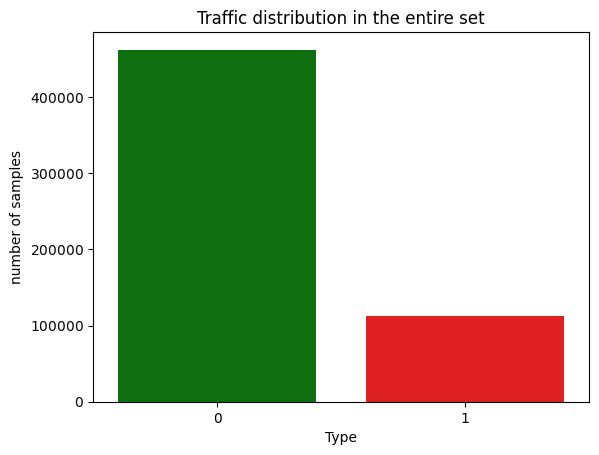

In [147]:
### plot distrtibution of Normal traffic and Attacks in the whole dataset 


plt.ticklabel_format(axis='y', useMathText=True, useOffset=False)  # change def ScalarFormatter

sns.countplot(x="is_attack", data=df, palette=["g","r"], legend=True)
plt.title("Traffic distribution in the entire set")
plt.xlabel("Type")
plt.ylabel("number of samples")
#plt.savefig("distribution1.png", dpi=200, format='png')
plt.show()

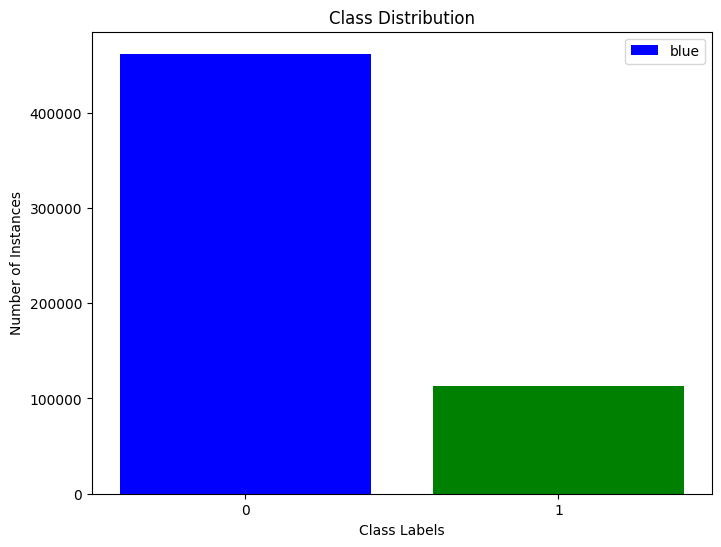

In [150]:
unique_classes = df['is_attack'].unique()
class_counts = df['is_attack'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(unique_classes, class_counts, color=['blue', 'green'],)
plt.xlabel('Class Labels')
plt.ylabel('Number of Instances')
plt.title('Class Distribution')
plt.xticks(unique_classes)
plt.legend(["blue", "green"], loc="upper right")
plt.show()